In [1]:
import pandas as pd
import numpy as np

In [2]:
db=pd.read_csv("diab.csv",header=None)
db.info()
db.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
0    768 non-null int64
1    768 non-null int64
2    768 non-null int64
3    768 non-null int64
4    768 non-null int64
5    768 non-null float64
6    768 non-null float64
7    768 non-null int64
8    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [3]:
db.columns=["pregnant_count","glucose","bp","skin_thickness","insulin","bmi","diabetics_pedigree","age","status"]
db.head(6)

,pregnant_count,glucose,bp,skin_thickness,insulin,bmi,diabetics_pedigree,age,status
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [4]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant_count        768 non-null int64
glucose               768 non-null int64
bp                    768 non-null int64
skin_thickness        768 non-null int64
insulin               768 non-null int64
bmi                   768 non-null float64
diabetics_pedigree    768 non-null float64
age                   768 non-null int64
status                768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
NA=db.dropna()
NA.shape

(768, 9)

In [6]:
pd_median=db["bp"].median()
db["bp"]=db["bp"].apply(lambda x:int(pd_median) if x==0 else x)
db["bp"].value_counts()

72     79
70     57
74     52
68     45
78     45
64     43
80     40
76     39
60     37
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
44      4
96      4
110     3
106     3
98      3
100     3
108     2
30      2
46      2
55      2
104     2
40      1
38      1
122     1
61      1
114     1
95      1
102     1
24      1
Name: bp, dtype: int64

In [7]:
pd_median=db["skin_thickness"].median()
db["skin_thickness"]=db["skin_thickness"].apply(lambda x:int(pd_median) if x==0 else x)
db["skin_thickness"].value_counts()

23    249
32     31
30     27
27     23
33     20
28     20
18     20
31     19
19     18
39     18
29     17
22     16
25     16
26     16
37     16
40     16
35     15
41     15
17     14
15     14
36     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
11      6
16      6
45      6
14      6
43      6
44      5
10      5
48      4
47      4
50      3
49      3
8       2
7       2
52      2
54      2
63      1
51      1
56      1
60      1
99      1
Name: skin_thickness, dtype: int64

In [8]:
db["status"].value_counts()

0    500
1    268
Name: status, dtype: int64

In [9]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant_count        768 non-null int64
glucose               768 non-null int64
bp                    768 non-null int64
skin_thickness        768 non-null int64
insulin               768 non-null int64
bmi                   768 non-null float64
diabetics_pedigree    768 non-null float64
age                   768 non-null int64
status                768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


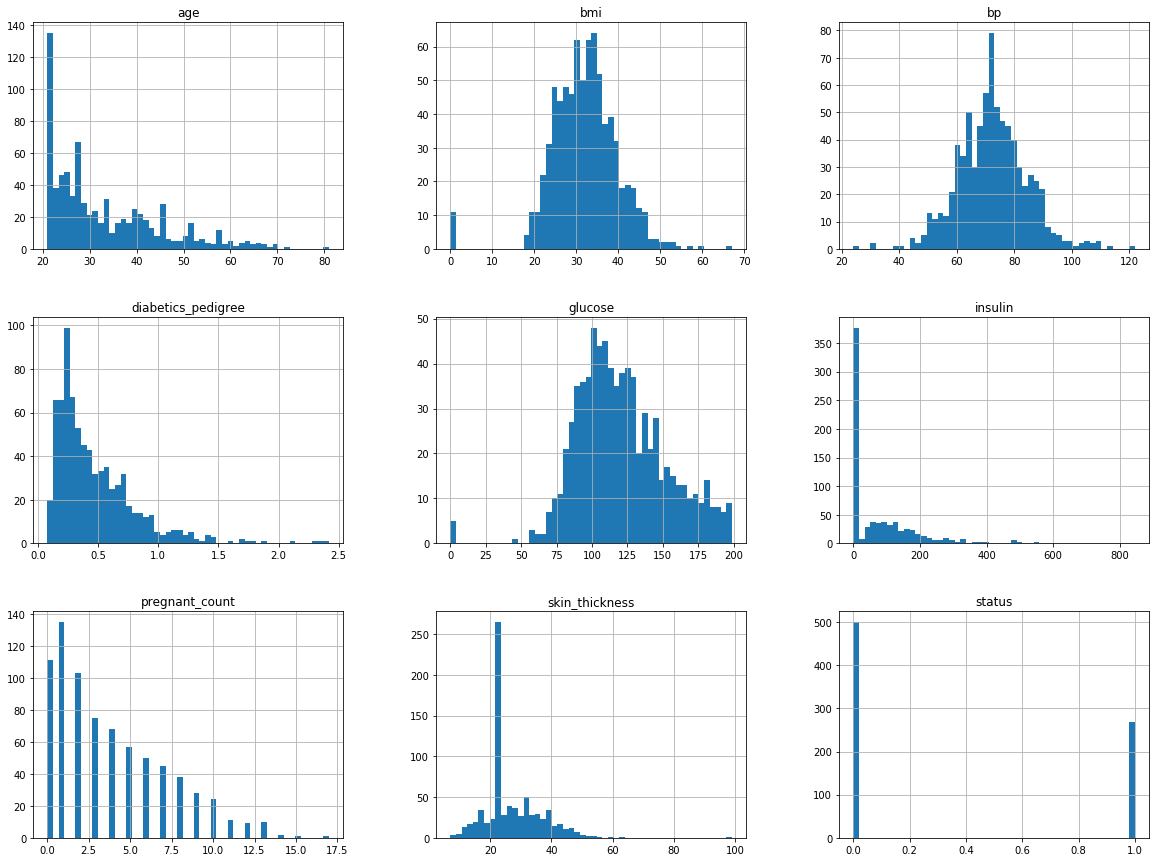

In [10]:
import matplotlib.pyplot as plt
db.hist(bins=50,figsize=(20,15))
plt.show()

C:\Users\Diva\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


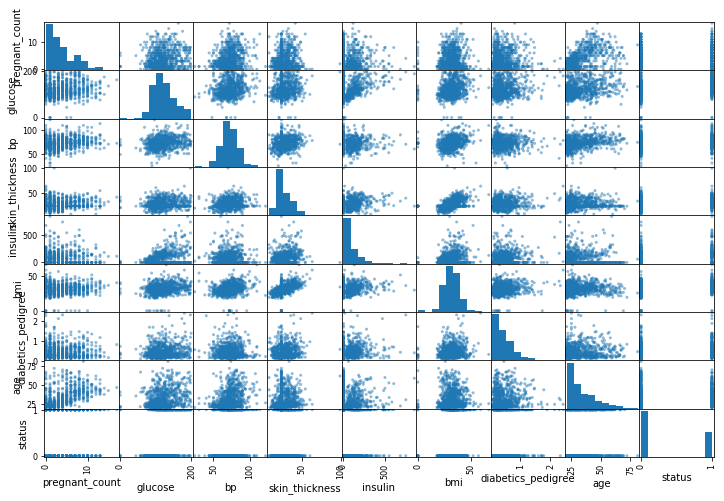

In [11]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(db, figsize=(12, 8))
plt.show()

In [12]:
from sklearn.model_selection import train_test_split #cross_validation in python3
train,test=train_test_split(db,random_state=20,test_size=0.3)
print(train.shape,test.shape)

(537, 9) (231, 9)


In [13]:
x=db.drop(["status"],axis=1)
y=db["status"]

In [14]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(random_state=20)
op=lgr.fit(x,y)
op

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=20, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [15]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(op,x,y,cv=3)

In [16]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred)
cm

array([[442,  58],
       [127, 141]], dtype=int64)

In [17]:
(cm[0][0]+cm[1][1])/float(np.sum(cm))*100

75.911458333333343

In [18]:
accuracy=((442+141)/768)*100
accuracy

75.91145833333334

In [19]:
from sklearn.ensemble import RandomForestClassifier
frst=RandomForestClassifier(random_state=20)
op=frst.fit(x,y)
op

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=20, verbose=0, warm_start=False)

In [20]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(op,x,y,cv=3)

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred)
cm

array([[431,  69],
       [129, 139]], dtype=int64)

In [22]:
import numpy as np
(cm[0][0]+cm[1][1])/float(np.sum(cm))*100

74.21875

In [23]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
opp=neigh.fit(x, y)

In [24]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(op,x,y,cv=3)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred)
cm

array([[431,  69],
       [129, 139]], dtype=int64)

In [25]:
(cm[0][0]+cm[1][1])/float(np.sum(cm))*100

74.21875

In [26]:
from sklearn.svm import LinearSVC
svm_clf=LinearSVC(random_state=20)
op=svm_clf.fit(x,y)
op

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=20, tol=0.0001,
     verbose=0)

In [27]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(op,x,y,cv=3)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y,y_pred)
(cm[0][0]+cm[1][1])/float(np.sum(cm))*100

69.53125

In [28]:
x_test=db.drop(["status"],axis=1)
y_test=db["status"]

In [29]:
y_test_pred=lgr.predict(x_test)
cm=confusion_matrix(y_test,y_test_pred)
(cm[0][0]+cm[1][1])/float(np.sum(cm))*100

76.953125

In [30]:
y_test_pred=frst.predict(x_test)
cm=confusion_matrix(y_test,y_test_pred)
(cm[0][0]+cm[1][1])/float(np.sum(cm))*100

98.4375

In [31]:
y_test_pred=svm_clf.predict(x_test)
cm=confusion_matrix(y_test,y_test_pred)
(cm[0][0]+cm[1][1])/float(np.sum(cm))*100

70.442708333333343

In [40]:
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'C':[0.1,0.5,1.0],'penalty':['l1','l2']}
]
log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg,param_grid,cv=3,scoring='neg_mean_squared_error')
grid_search.fit(x,y)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [0.1, 0.5, 1.0], 'penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [43]:
print('best params:{0}\n\nbest estimator:{1}\n'.format(grid_search.best_params_,grid_search.best_estimator_))
#Evaluation score
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"],cvres["params"]):
     print(np.sqrt(-mean_score),params)

best params:{'C': 1.0, 'penalty': 'l1'}

best estimator:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.5291010458 {'C': 0.1, 'penalty': 'l1'}
0.535218024111 {'C': 0.1, 'penalty': 'l2'}
0.492125492126 {'C': 0.5, 'penalty': 'l1'}
0.506468574214 {'C': 0.5, 'penalty': 'l2'}
0.490800791225 {'C': 1.0, 'penalty': 'l1'}
0.490800791225 {'C': 1.0, 'penalty': 'l2'}


In [44]:
lgr=grid_search.best_estimator_
y_test_pred=lgr.predict(x_test)
cm=confusion_matrix(y_test,y_test_pred)
(cm[0][0]+cm[1][1])/float(np.sum(cm))*100

77.734375